# Assigment 1

Juan Navarro, <jsnavarroa@unal.edu.co>

## 1. Do the tutorial “Kaggle Python Tutorial on Machine Learning” (https://www.datacamp.com/courses/kaggle-python-tutorial-on-machine-learning). Complete the 3 chapters and include a screenshot showing the 100% completion of each chapter, as well as a screenshot of the submission to Kaggle.

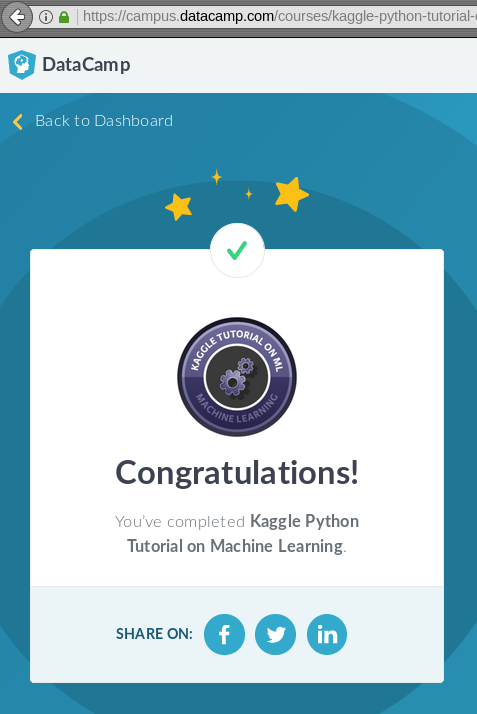

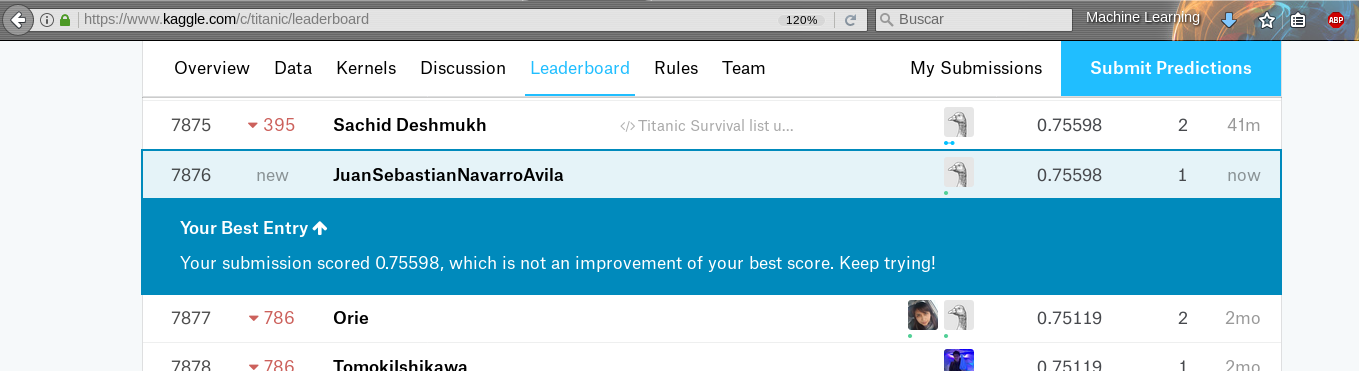

In [1]:
from IPython.display import display, Image

display(Image(filename='./img/tutorial1.png'))
display(Image(filename='./img/submission1.png'))

## 2. Let $ D = \{d_1 , . . . , d_n \} $ be a set of documents and $ T = \{t_1 , . . . , t_m \} $ a set of terms (words). Let $ TD = (TD_{i,j} )_{i=1...m,j=1...n} $ be a matrix such that $ TD_{i,j} $ corresponds to the number of times the term $ t_i $ appears in the document $ d_j $. Also, let $ l_i $ be the length, number of characters, of term $ t_i $ , and let $ L = (l_1 , . . . , l_m ) $ be a column vector. Finally, assume a process where a document $ d_j $ is randomly chosen with uniform probability and then a term $ t_i $ , present in $ d_j $ , is randomly chosen with a probability proportional to the frequency of $ t_i $ in $ d_j $.

For all the following expressions you must provide:

* a mathematical expression to calculate it that includes TD, L, constants (scalars, vectors or matrices) and linear algebra operations

* a expression in Numpy (http://www.scipy.org) that, when evaluated, generates the requested matrix, vector or scalar (the expression must be a linear algebra expression that does not involve control structures such as for, while etc.)

* the result of evaluating the expression, assuming:

In [2]:
import numpy as np

TD=np.array([(2, 3, 0, 3, 7),
            (0, 5, 5, 0, 3),
            (5, 0, 7, 3, 3),
            (3, 1, 0, 9, 9),
            (0, 0, 7, 1, 3),
            (6, 9, 4, 6, 0)])

L=np.array([[5],
            [2],
            [3],
            [6],
            [4],
            [3]])

m = TD.shape[0]
n = TD.shape[1]

print(TD.shape)
print(L.shape)

(6, 5)
(6, 1)


### 2.a Matrix P (T, D) (each position of the matrix, $ P(T, D)_{i, j} $ , corresponds to the joint probability of term $ t_i $ and document $ d_j $ , $ P(t_i, d_j) $)

\begin{equation*}
\large
P(T, D)_{m_{x}n} = P(T | D)_{m_{x}n} P(D)
\end{equation*}

$$ \large P(D) = \frac{1}{n} * J_{n, 1} $$

$$ \large P(t_i | d_j) = \frac{TD_{i,j}}{ \sum_{k=0}^{i} TD_{k,j} } $$

$$ \large P(T | D) = TD * (I_n * (J_{n,m} \bullet TD))^{-1} $$

In [11]:
def print_array(name, array):
    np.set_printoptions(suppress=True)
    print(name, array.shape, "\n", array)

# The documents are in the columns and have uniform distribution
p_D = (1/n)*np.eye(n)

# Divide the occurences of each element (cell) by the number of terms in the document (column sum)
col_sum  = np.eye(n) * np.ones((n, m)).dot(TD)
print_array("col_sum", col_sum)
p_T_given_D = np.matmul(TD, np.linalg.inv(col_sum))

# Calc de joint probability
print_array("p_T_given_D", p_T_given_D)

p_TD = np.matmul(p_T_given_D, p_D)

print(np.sum(p_TD) == 1)

print_array("p_TD", p_TD)

col_sum (5, 5) 
 [[16.  0.  0.  0.  0.]
 [ 0. 18.  0.  0.  0.]
 [ 0.  0. 23.  0.  0.]
 [ 0.  0.  0. 22.  0.]
 [ 0.  0.  0.  0. 25.]]
p_T_given_D (6, 5) 
 [[0.125      0.16666667 0.         0.13636364 0.28      ]
 [0.         0.27777778 0.2173913  0.         0.12      ]
 [0.3125     0.         0.30434783 0.13636364 0.12      ]
 [0.1875     0.05555556 0.         0.40909091 0.36      ]
 [0.         0.         0.30434783 0.04545455 0.12      ]
 [0.375      0.5        0.17391304 0.27272727 0.        ]]
True
p_TD (6, 5) 
 [[0.025      0.03333333 0.         0.02727273 0.056     ]
 [0.         0.05555556 0.04347826 0.         0.024     ]
 [0.0625     0.         0.06086957 0.02727273 0.024     ]
 [0.0375     0.01111111 0.         0.08181818 0.072     ]
 [0.         0.         0.06086957 0.00909091 0.024     ]
 [0.075      0.1        0.03478261 0.05454545 0.        ]]


### 2.b Matrix P (T|D)

$$ \large P(T | D)_{m_{x}n} = \frac{P(T, D)_{m_{x}n}}{P(D)} $$

In [4]:
p_T_given_D = np.matmul(p_TD, np.linalg.inv(p_D)) 

print_array("p_T_given_D", p_T_given_D)

p_T_given_D (6, 5) 
 [[0.125      0.16666667 0.         0.13636364 0.28      ]
 [0.         0.27777778 0.2173913  0.         0.12      ]
 [0.3125     0.         0.30434783 0.13636364 0.12      ]
 [0.1875     0.05555556 0.         0.40909091 0.36      ]
 [0.         0.         0.30434783 0.04545455 0.12      ]
 [0.375      0.5        0.17391304 0.27272727 0.        ]]


### 2.c Matrix P(D|T )

$$ \large P(d_i | t_j) = \frac{TD_{i,j}}{ \sum_{k=0}^{j} TD_{i,k} } $$

$$ \large P(D | T) = (I_m * (J_{m,n} \bullet TD^T))^{-1} * TD $$

In [5]:
row_sum  = np.eye(m) * np.ones((m, n)).dot(TD.T)

print_array("row_sum", row_sum)

p_D_given_T = np.matmul(np.linalg.inv(row_sum), TD)

print_array("p_D_given_T", p_D_given_T)

row_sum (6, 6) 
 [[15.  0.  0.  0.  0.  0.]
 [ 0. 13.  0.  0.  0.  0.]
 [ 0.  0. 18.  0.  0.  0.]
 [ 0.  0.  0. 22.  0.  0.]
 [ 0.  0.  0.  0. 11.  0.]
 [ 0.  0.  0.  0.  0. 25.]]
p_D_given_T (6, 5) 
 [[0.13333333 0.2        0.         0.2        0.46666667]
 [0.         0.38461538 0.38461538 0.         0.23076923]
 [0.27777778 0.         0.38888889 0.16666667 0.16666667]
 [0.13636364 0.04545455 0.         0.40909091 0.40909091]
 [0.         0.         0.63636364 0.09090909 0.27272727]
 [0.24       0.36       0.16       0.24       0.        ]]


### 2.d Vector P(D)

$$ \large P(D)_{} = \frac{P(T, D)_{m_{x}n}} {P(T | D)_{m_{x}n}} = \frac{1}{n} * I_{n} $$

In [15]:
p_D = np.matmul(np.linalg.pinv(p_T_given_D), p_TD)

p_D = np.matmul(p_D, np.ones((n, 1)))

print_array("p_D", p_D)

p_D (5, 1) 
 [[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]]


### 2.e Vector P (T )

### 2.f


\begin{equation*}
\large
E[l] = \sum_{i} l_i P(l_i) = \frac{1}{m} * L * \textbf{1}_{m_{x}1}
\end{equation*}

In [8]:
E = (1/m) * L * (np.ones((m,1)))
E

array([[0.83333333],
       [0.33333333],
       [0.5       ],
       [1.        ],
       [0.66666667],
       [0.5       ]])

### 2.g

\begin{equation*}
\large
B = L - \mu \\
\large
Var[l] = E[(l-\mu)^2] = \frac{1}{m} * (B \circ B) * \textbf{1}_{m_{x}1}
\end{equation*}

In [9]:
b = np.power((L-np.mean(L)), 2)

print(b)

b = L-np.mean(L)
# Hadamard product
b = np.multiply(b, b)

print(b)

var = (1/m) * b.dot(np.ones((m,1)))

var

[[1.36111111]
 [3.36111111]
 [0.69444444]
 [4.69444444]
 [0.02777778]
 [0.69444444]]
[[1.36111111]
 [3.36111111]
 [0.69444444]
 [4.69444444]
 [0.02777778]
 [0.69444444]]


ValueError: shapes (6,1) and (6,1) not aligned: 1 (dim 1) != 6 (dim 0)